# __Marketing Campaigns Analysis__

## __Import Libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from datetime import datetime

## __Load Datasets__

In [5]:
marketing_data = pd.read_csv('marketing_data.csv')
data_dictionary = pd.read_excel('Data Dictionary - Response to marketing campaigns.xlsx')

marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## __Clean the Column Names__

In [6]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [8]:
marketing_data.columns = marketing_data.columns.str.strip()
marketing_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [9]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

## __Convert 'Dt_Customer' from object to datetime data type__

In [10]:
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'], format='%m/%d/%y', errors='coerce')
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [38]:
# Check for missing values for income column
missing_income = marketing_data['Income'].isnull().sum()
print(f"Missing values in 'Income' column: {missing_income}")

Missing values in 'Income' column: 0


In [39]:
has_missing = marketing_data['Income'].isnull().any()
print(f"Does 'Income' have any missing values? {has_missing}")

Does 'Income' have any missing values? False


In [43]:
# Display rows where 'Income' is missing
missing_income_rows = marketing_data[marketing_data['Income'].isnull()]
print("Rows with missing 'Income' values:")
print(missing_income_rows)

# You can also get just the 'Income' column for these rows if you want to see only the missing values
missing_income_values = marketing_data.loc[marketing_data['Income'].isnull(), 'Income']
print("\nMissing 'Income' values themselves:")
print(missing_income_values)

Rows with missing 'Income' values:
Empty DataFrame
Columns: [ID, Year_Birth, Education, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Age, Total_Children, Total_Spending, Marital_Status_Alone, Marital_Status_Divorced, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow, Marital_Status_YOLO, Country_CA, Country_GER, Country_IND, Country_ME, Country_SA, Country_SP, Country_US]
Index: []

[0 rows x 43 columns]

Missing 'Income' values themselves:
Series([], Name: Income, dtype: float64)


## __Clean 'Income' Column__

In [13]:
marketing_data['Income'] = marketing_data['Income'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
marketing_data['Income']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2235    0.0
2236    0.0
2237    0.0
2238    0.0
2239    0.0
Name: Income, Length: 2240, dtype: float64

## __Impute missing 'Income' values based on 'Education' and 'Marital_Status'__

In [14]:
income_impute = marketing_data.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')
marketing_data['Income'] = marketing_data['Income'].fillna(income_impute)

In [15]:
income_impute.head()

0    0.000000
1    0.023810
2    0.009238
3    0.003497
4    0.023810
Name: Income, dtype: float64

## __Create new variables: 'Age', 'Total_Children', 'Total_Spending'__

In [17]:
current_year = datetime.now().year
marketing_data['Age'] = current_year - marketing_data['Year_Birth']
marketing_data['Total_Children'] = marketing_data['Kidhome'] + marketing_data['Teenhome']
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
marketing_data['Total_Spending'] = marketing_data[spending_columns].sum(axis=1)

## __Visualize distributions and handle outliers__

In [18]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

cap_outliers(marketing_data, 'Age')
cap_outliers(marketing_data, 'Total_Spending')

## __Apply Encoding__

In [19]:
education_order = ['PhD', 'Master', 'Graduation', 'Basic']
marketing_data['Education'] = pd.Categorical(marketing_data['Education'], categories=education_order, ordered=True)
marketing_data['Education'] = marketing_data['Education'].cat.codes
marketing_data = pd.get_dummies(marketing_data, columns=['Marital_Status', 'Country'], drop_first=True)

## __Correlation Heatmap__

In [20]:
corr_matrix = marketing_data.corr()

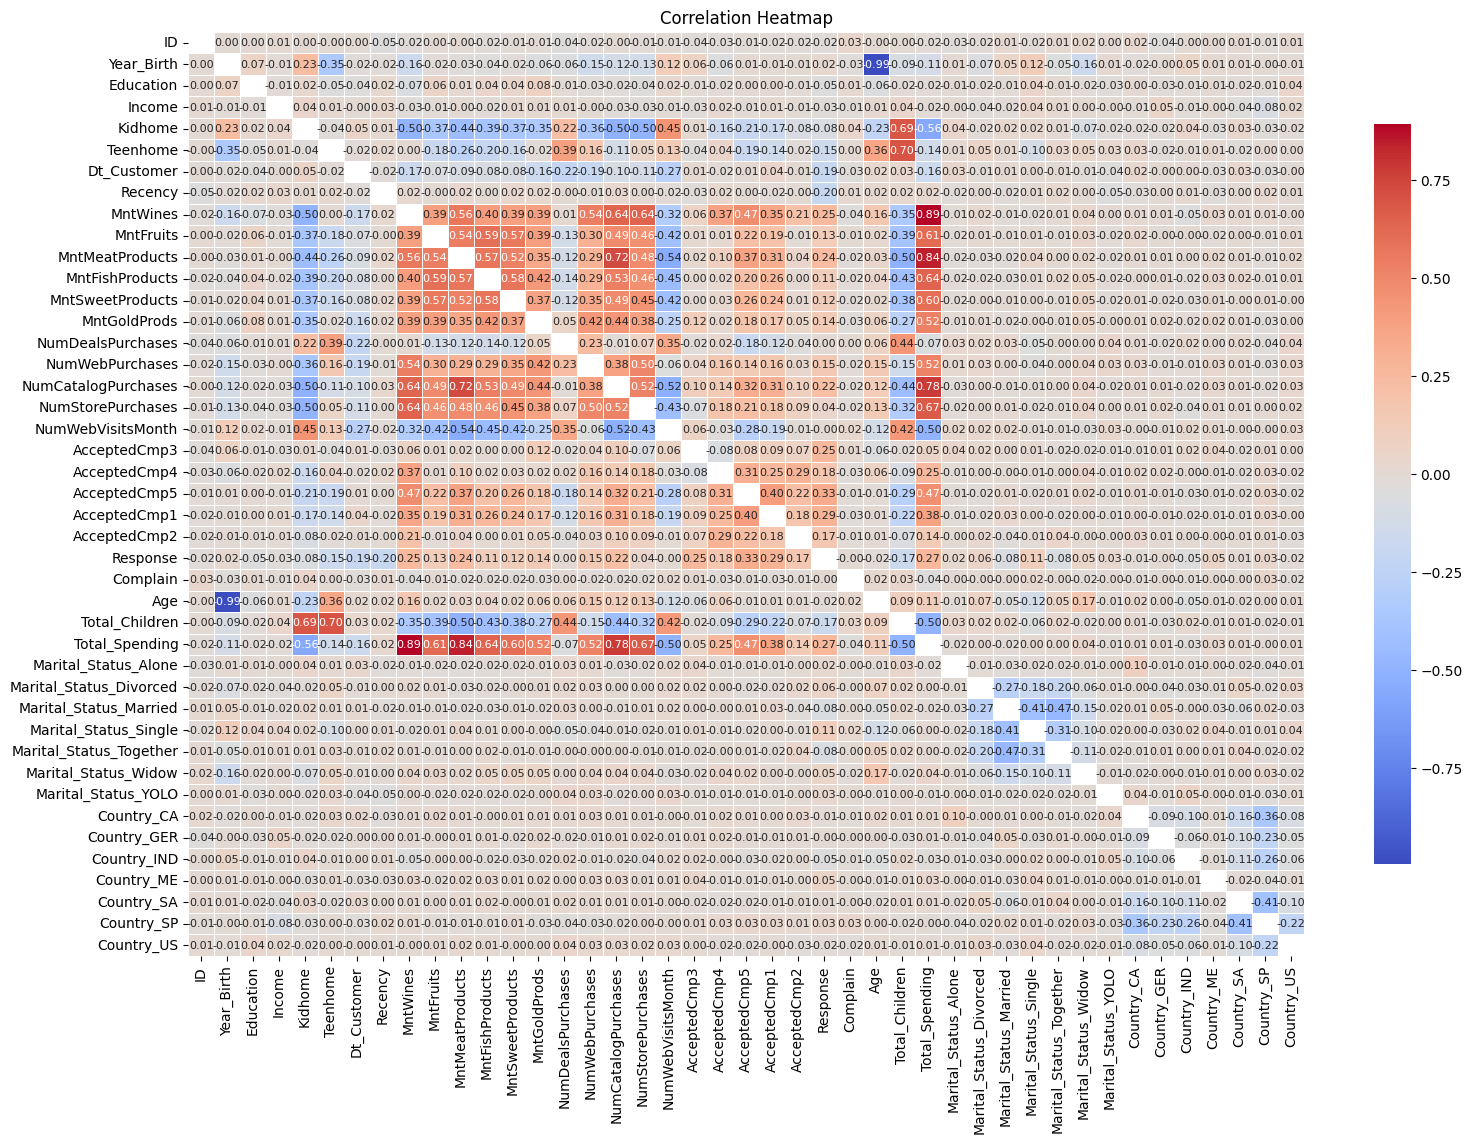

In [23]:
mask = np.eye(corr_matrix.shape[0], dtype=bool)

plt.figure(figsize=(18, 12))  # Increase figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={'size': 8}, cbar_kws={'shrink': 0.8}, mask=mask)  # Add size to annotations
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.title('Correlation Heatmap')
plt.show()

## __Hypothesis Testing__

### __a. Older individuals may prefer in-store shopping (NumStorePurchases vs NumWebPurchases)__

In [27]:
older_group = marketing_data[marketing_data['Age'] > 50]
younger_group = marketing_data[marketing_data['Age'] <= 50]
t_stat, p_value = ttest_ind(older_group['NumStorePurchases'], younger_group['NumStorePurchases'], nan_policy='omit')
print('Older vs Younger (In-store purchases):\n') 
print('t-statistic =', t_stat)
print('p-value =' , p_value)

Older vs Younger (In-store purchases):

t-statistic = 4.493210537290091
p-value = 7.373005629031434e-06


__Analysis:__ 
- With a p-value (7.373×10^−6) significantly less than 0.05 (the conventional significance level), we reject the null hypothesis. 
- This indicates a statistically significant difference in in-store purchase behavior between older and younger individuals. 
- The positive t-statistic suggests that older individuals tend to make significantly more in-store purchases than younger individuals. 
- This supports the hypothesis that older individuals may prefer in-store shopping.

### __b. Customers with children may prefer online shopping__

In [30]:
with_children = marketing_data[marketing_data['Kidhome'] > 0]
without_children = marketing_data[marketing_data['Kidhome'] == 0]
t_stat_children, p_value_children = ttest_ind(with_children['NumWebPurchases'], without_children['NumWebPurchases'], nan_policy='omit')
print('With Children vs Without Children (Online purchases):\n')
print('t-statistic =', t_stat_children)
print('p-value =', p_value_children)

With Children vs Without Children (Online purchases):

t-statistic = -19.06984762853535
p-value = 3.0290228921834255e-75


__Analysis:__
- With an extremely low p-value (3.029×10^−75), which is far less than 0.05, we reject the null hypothesis. 
- This indicates a highly statistically significant difference in online purchase behavior between customers with children and those without. 
- The negative t-statistic suggests that customers with children (Kidhome > 0) tend to make significantly fewer online purchases compared to those without children (Kidhome == 0). 
- This result contradicts the initial hypothesis that customers with children may prefer online shopping; instead, it suggests the opposite or that other factors are at play.

### __c. Sales at physical stores may face the risk of cannibalization by other distribution channels__

In [31]:
corr_store_web = marketing_data[['NumStorePurchases', 'NumWebPurchases']].corr().iloc[0, 1]
print(f"Correlation between in-store and online purchases: {corr_store_web}")

Correlation between in-store and online purchases: 0.502713413299731


__Analysis:__
- A correlation coefficient of 0.5027 indicates a moderately positive correlation between in-store and online purchases. 
- This suggests that as online purchases increase, in-store purchases also tend to increase, and vice-versa. 
- Therefore, the data does not support the hypothesis of cannibalization. Instead, it points towards a synergistic or complementary relationship between the two channels, meaning they tend to grow together, or perhaps a strong overall customer base that engages with both channels.

### __d. The United States may significantly outperform other countries in total purchases__

In [35]:
us_customers = marketing_data[marketing_data['Country_US'] == 1]

other_countries_customers = marketing_data[marketing_data['Country_US'] == 0]
t_stat_us, p_value_us = ttest_ind(us_customers['NumStorePurchases'], other_countries_customers['NumStorePurchases'], nan_policy='omit')
print('US vs Other Countries (Total purchases):\n')
print('t-statistic =', t_stat_us)
print('p-value =', p_value_us)

US vs Other Countries (Total purchases):

t-statistic = 0.8116165251094851
p-value = 0.4170980165345467


__Analysis:__ 
- With a p-value of 0.4171, which is greater than 0.05, we fail to reject the null hypothesis. 
- This indicates that there is no statistically significant difference in total purchases between customers in the United States and those in other countries based on this dataset. 
- Therefore, the hypothesis that the United States significantly outperforms other countries in total purchases is not supported by the data.

## __Overall Conclusion__

The analysis of this marketing campaign data provides several key insights:

__Age and In-Store Purchases:__ Older individuals demonstrate a statistically significant preference for in-store shopping, making notably more in-store purchases than younger individuals. This suggests targeted in-store promotions or loyalty programs for older demographics could be highly effective.

__Children and Online Purchases:__ Contrary to the initial hypothesis, customers with children make significantly fewer online purchases compared to those without children. This counter-intuitive finding warrants further investigation into the reasons behind this behavior. It could indicate challenges in the online shopping experience for families, or that families prioritize in-store shopping for other reasons (e.g., larger basket sizes, specific product needs). Marketing strategies aimed at families might need to rethink their online vs. in-store approach.

__Physical vs. Online Store Relationship:__ The moderately positive correlation between in-store and online purchases suggests a synergistic relationship, rather than cannibalization. This implies that these channels complement each other, possibly by driving overall brand engagement. Efforts to integrate the customer experience across both channels could further enhance total sales.

__US vs. Other Countries Performance:__ The data does not show a statistically significant difference in total purchases between US customers and those from other countries. This indicates that while the US market is important, it does not currently "outperform" other regions in terms of individual customer purchase volume in a statistically meaningful way. Marketing and resource allocation strategies should consider this parity.

These findings can inform future marketing strategies, product development, and resource allocation to optimize campaign effectiveness and overall business performance. Further qualitative research might be beneficial to understand the underlying reasons for the observed behaviors, especially regarding online purchases among customers with children.